In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

This is perhaps the best known database to be found in the pattern recognition literature. Fisher's paper is a classic in the field and is referenced frequently to this day. (See Duda & Hart, for example.) The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other. 

Predicted attribute: **class of iris plant. **

More on K-Nearest Neighbourhood algoritm

https://kevinzakka.github.io/2016/07/13/k-nearest-neighbor/

In [74]:
data = pd.read_csv('iris_data.csv')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [75]:
# types of class
data['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

Text(0,0.5,'Petal Width in cm')

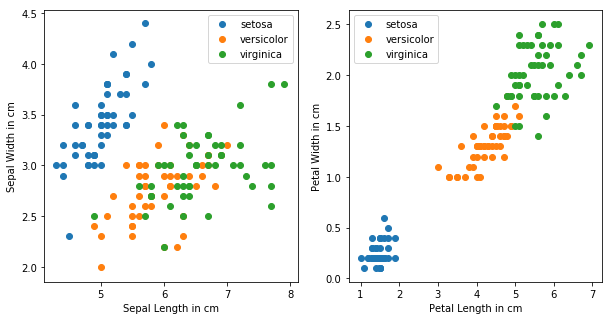

In [76]:
# visualization
setosa = data[data['class']=='Iris-setosa']
versicolor = data[data['class']=='Iris-versicolor']
virginica = data[data['class']=='Iris-virginica']

fig = plt.figure(figsize=(10,5))

ax1 = plt.subplot(121)
ax1.scatter(setosa['sepal_length'],setosa['sepal_width'],label='setosa')
ax1.scatter(versicolor['sepal_length'],versicolor['sepal_width'],label='versicolor')
ax1.scatter(virginica['sepal_length'],virginica['sepal_width'],label='virginica')
ax1.legend()
ax1.set_xlabel('Sepal Length in cm')
ax1.set_ylabel('Sepal Width in cm')

ax1 = plt.subplot(122)
ax1.scatter(setosa['petal_length'],setosa['petal_width'],label='setosa')
ax1.scatter(versicolor['petal_length'],versicolor['petal_width'],label='versicolor')
ax1.scatter(virginica['petal_length'],virginica['petal_width'],label='virginica')
ax1.legend()
ax1.set_xlabel('Petal Length in cm')
ax1.set_ylabel('Petal Width in cm')

Intuitive model -
- setosa has greater sepal width and smaller sepal length. Also sepal has lowest petal width and length
- Vericolor has medium size petals.
- Virginica has the largest petal size.

Modelling
---

In [77]:
# extracting the variables
X = np.array(data.iloc[:,0:-1]).reshape(-1,4)
Y = np.array(data.iloc[:,-1])

# splitting the dataset
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.33,random_state=0)

In [82]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3,metric='minkowski',p=2)
classifier.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [83]:
Y_pred = classifier.predict(X_test)

In [84]:
# Evaluation
from sklearn.metrics import confusion_matrix
c = confusion_matrix(Y_pred,Y_test)
correct = sum(c.diagonal())
total = sum(sum(c))
correct/total*100

96.0

Parameter Tuning with Cross Validation
---

 so let’s suppose we carry out repeated measurements of the test error for different values of K, it means that we are using the same test set to see the error repeatedly. Hence our test set becomes our new training set for evaluating the model. In other words for our model the fitted parameters will be based on the **same training set**  and the evaluation will be based on the **same test set**. Hence our model will not be good for predicting a entirely new dataset (**Overfitting**)

Using the test set for hyperparameter tuning can lead to overfitting.

K-Fold validation algorithm
----

1. An alternative and smarter approach involves estimating the test error rate by holding out a subset of the training set from the fitting process.
2.  This subset, called the validation set, can be used to select the appropriate level of flexibility of our algorithm! There are different validation approaches that are used in practice, and we will be exploring one of the more popular ones called k-fold cross validation
3. k-fold cross validation involves randomly dividing the training set into k groups of approximately equal size
4. The first fold is treated as a validation set, and the method is fit on the remaining k−1 folds
5. The misclassification rate is then computed on the observations in the held-out fold
6. This procedure is repeated k times; each time, a different group of observations is treated as a validation set. This process results in k estimates of the test error which are then averaged out

data = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]

-> taking k=3 it means it will make 3 groups and model using one training and one test set k=3 times 

- Fold1: [0.5, 0.2]
- Fold2: [0.1, 0.3]
- Fold3: [0.4, 0.6]


**Model1: Trained on Fold1 + Fold2, Tested on Fold3**

**Model2: Trained on Fold2 + Fold3, Tested on Fold1**

**Model3: Trained on Fold1 + Fold3, Tested on Fold2**

In [97]:
# one example
data = np.array([1,2,3,4,5,6,7,8,9,0])

# create the folds using kFold function from sklearn
from sklearn.model_selection import KFold
kfold = KFold(n_splits = 3, shuffle=True, random_state=0) # with shuffling without replacement
for train, test in kfold.split(data):
    print('train = %s | test = %s' % (data[train],data[test]))

train = [1 2 4 6 7 8] | test = [3 5 9 0]
train = [1 3 4 5 6 9 0] | test = [2 7 8]
train = [2 3 5 7 8 9 0] | test = [1 4 6]


further study: https://machinelearningmastery.com/k-fold-cross-validation/

here are a number of variations on the k-fold cross validation procedure.

Three commonly used variations are as follows:

- Train/Test Split: Taken to one extreme, k may be set to 1 such that a single train/test split is created to evaluate the model.
- LOOCV: Taken to another extreme, k may be set to the total number of observations in the dataset such that each observation is given a chance to be the held out of the dataset. This is called leave-one-out cross-validation, or LOOCV for short.
- Stratified: The splitting of data into folds may be governed by criteria such as ensuring that each fold has the same proportion of observations with a given categorical value, such as the class outcome value. This is called stratified cross-validation.
- Repeated: This is where the k-fold cross-validation procedure is repeated n times, where importantly, the data sample is shuffled prior to each repetition, which results in a different split of the sample.

The scikit-learn library provides a suite of cross-validation implementation. You can see the full list in the Model Selection API

7

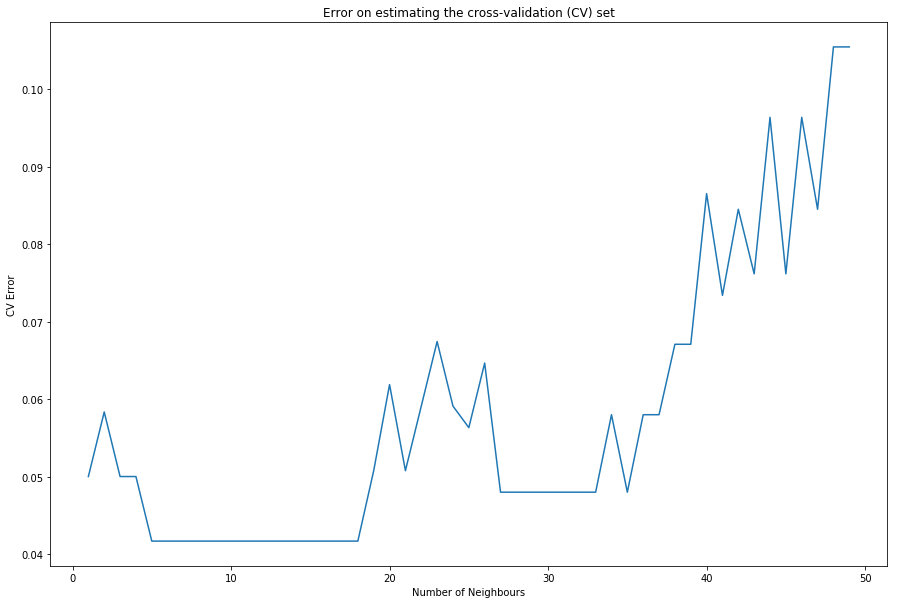

In [87]:
# 10-fold cross-validation for odd K value (KNN) in the range of 50
K = list(range(1,50))
neighbors = [x for x in K]
cv_scores = []

fig = plt.figure(figsize=(15,10))

from sklearn.model_selection import cross_val_score
for k in neighbors:
    model = KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2)
    score = cross_val_score(model,X_train,Y_train,cv=10,scoring='accuracy')
    cv_scores.append(1-np.mean(score))
    
## visualization of cv_scores
plt.plot(neighbors,cv_scores)
plt.xlabel('Number of Neighbours')
plt.ylabel('CV Error')
plt.title('Error on estimating the cross-validation (CV) set')
# K (KNN) value with minimum cross-validation error
neighbors[cv_scores.index(min(cv_scores))]

In [85]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=7,metric='minkowski',p=2)
classifier.fit(X_train,Y_train)
# prediction
Y_pred = classifier.predict(X_test)
# Evaluation
from sklearn.metrics import confusion_matrix
c = confusion_matrix(Y_pred,Y_test)
correct = sum(c.diagonal())
total = sum(sum(c))
correct/total*100

98.0

Now we are getting a more accuarate model than the model with K=3 with 96 % accuracy